In [128]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, minmax_scale
import seaborn as sns
import pickle
%matplotlib inline

In [129]:
# Converting the dataset to dataframe
df = pd.read_excel(r'C:\Users\sweek\OneDrive\Desktop\Courses\Neural_network_and_deep_learning\Multiple_linear_regression\Algerian Forest Fire\Algerian_forest_fires_cleaned.xlsx')

In [130]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [131]:
# Checking for null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [132]:
#Checking for duplicate values
df.duplicated().sum()

0

In [133]:
#Descriptive analysis
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [134]:
# Encoding categorical values
mapping = {'fire   ': 1, 'not fire   ': 0}

# Apply the mapping to the 'Classes' column
df['Classes_encoded'] = df['Classes'].map(mapping)

In [135]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_encoded
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,0.0


In [136]:
# Drop all NaN values from the 'Classes_encoded' column
df.dropna(subset=['Classes_encoded'], inplace=True)

In [137]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_encoded
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,not fire,1,0.0
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0.0


In [138]:
# Dropping the time metrics and string column
df_copy = df.drop(['day', 'month', 'year', 'Classes'], axis=1)

In [139]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_encoded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,1,0.0
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0.0


In [140]:
# Checking for null values
df_copy.isna().sum()

Temperature        0
RH                 0
Ws                 0
Rain               0
FFMC               0
DMC                0
DC                 0
ISI                0
BUI                0
FWI                0
Region             0
Classes_encoded    0
dtype: int64

In [141]:
# Keeping uniform datatype across all columns
df_copy = df_copy.astype(float)

In [142]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 241
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      235 non-null    float64
 1   RH               235 non-null    float64
 2   Ws               235 non-null    float64
 3   Rain             235 non-null    float64
 4   FFMC             235 non-null    float64
 5   DMC              235 non-null    float64
 6   DC               235 non-null    float64
 7   ISI              235 non-null    float64
 8   BUI              235 non-null    float64
 9   FWI              235 non-null    float64
 10  Region           235 non-null    float64
 11  Classes_encoded  235 non-null    float64
dtypes: float64(12)
memory usage: 23.9 KB


<Axes: >

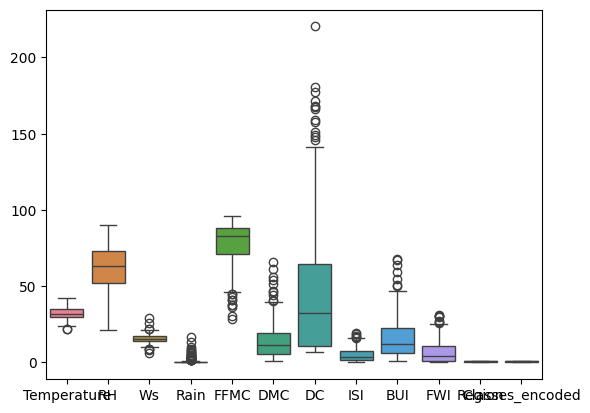

In [143]:
# Generating boxplot to visualize outliers
sns.boxplot(df_copy)

In [144]:
# Calcualting Q1, Q3 and IQR to handle outliers
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1

# Filter out outliers
df_copy = df_copy[~((df_copy < (Q1 - threshold * IQR)) | (df_copy > (Q3 + threshold * IQR))).any(axis=1)]

<Axes: >

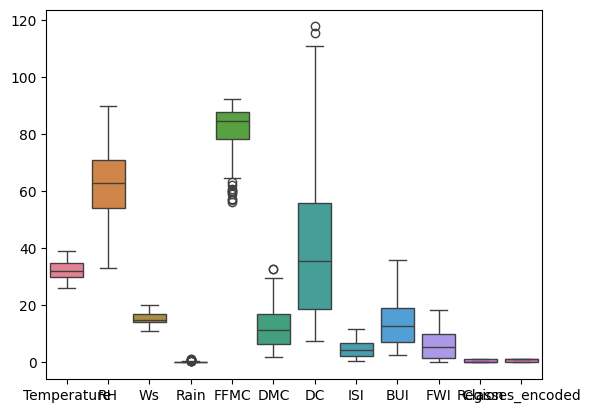

In [145]:
# Outliers handled
sns.boxplot(df_copy)

<Axes: >

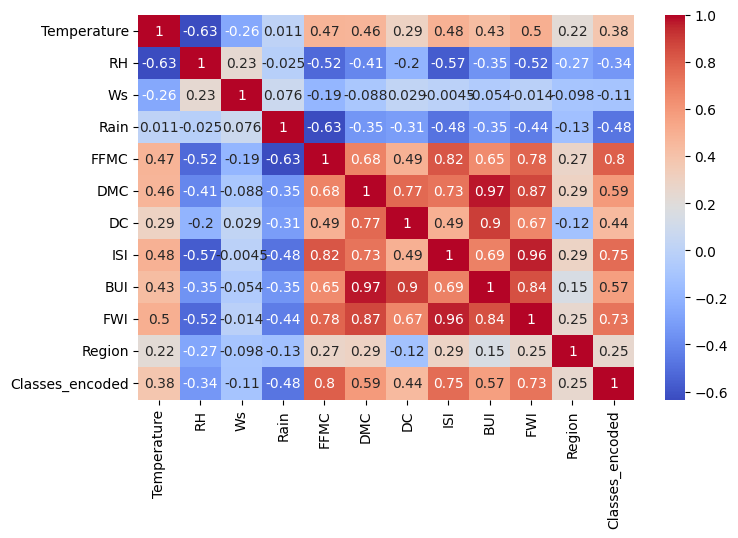

In [146]:
plt.figure(figsize=(8,5))
sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=True)

In [147]:
X = df_copy.drop(columns=['FWI'])
y = df_copy['FWI']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [149]:
scaler = StandardScaler()

In [150]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

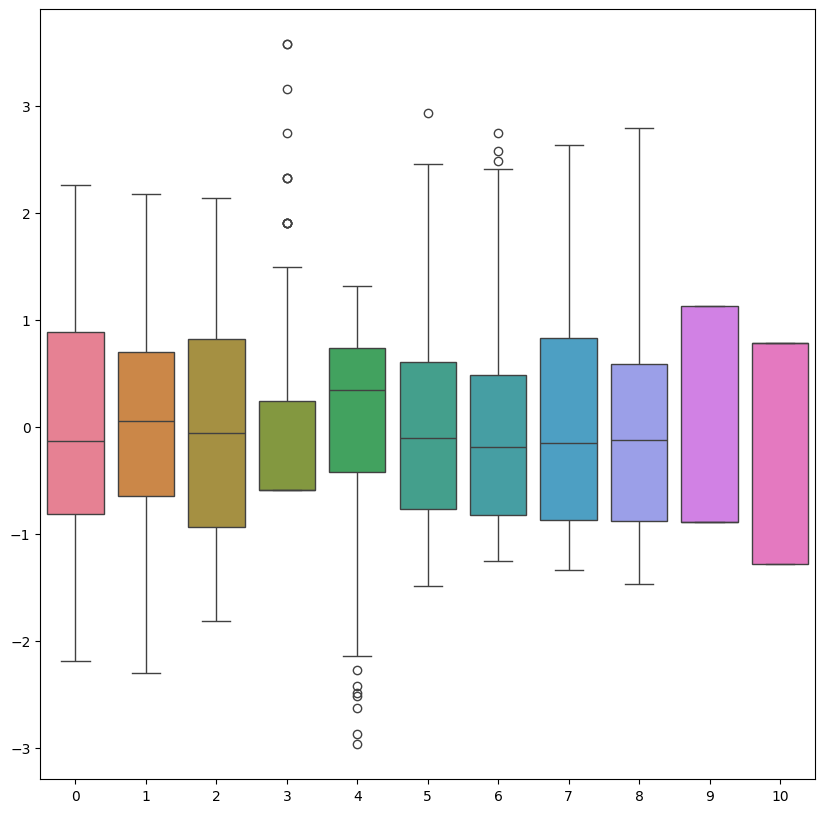

In [151]:
#outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train_scaled)
plt.show()

In [152]:
lr_fire=LinearRegression()
lr_fire.fit(X_train_scaled, y_train)

LinearRegression()

In [153]:
lr_fire.coef_, lr_fire.intercept_

(array([ 0.0978075 ,  0.05780144, -0.01135693, -0.03680025, -0.73812355,
        -0.03998246, -0.23214546,  3.89472602,  2.00477566, -0.04686062,
         0.14745279]),
 5.8646551724137925)

In [154]:
y_pred = lr_fire.predict(X_test_scaled)

In [155]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, mae, r2)

0.3054459388587237 0.383529293362224 0.9870002350878129


In [156]:
pickle.dump(lr_fire, open('lr_fire.pkl', 'wb'))

In [157]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))